<a href="https://colab.research.google.com/github/mjkanf1994/ml_edu/blob/master/20200821seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting functions

## visualizing statistical relationaship(통계적 관계 시각화)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1). realating variables with scatter plot (산점도와 변수 연결하기)

- 이 함수는 하위 집합의 의미 매핑을 사용하여 두 변수 간의 관계를 보여주는 여러 축 수준 함수에 대한 액세스를 제공합니다. 

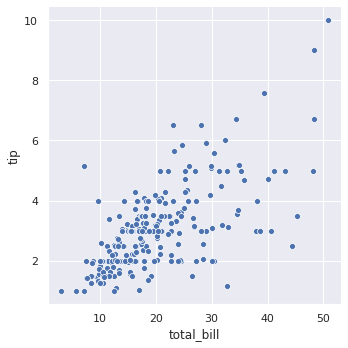

In [3]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

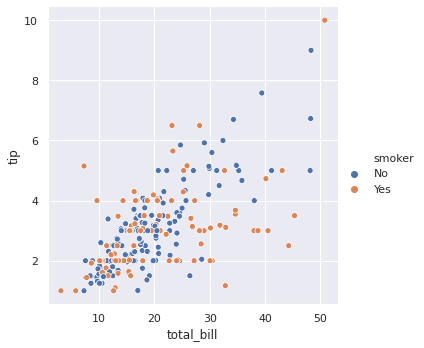

In [4]:
 sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

- 세 번째 변수에 따라 점을 색칠하여 다른 차원을 플롯에 추가

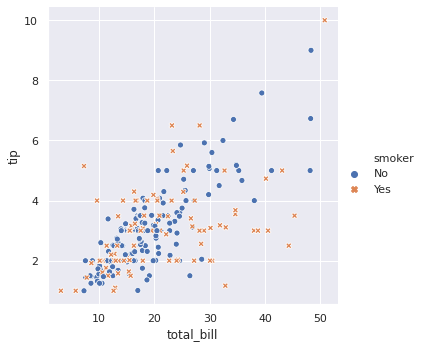

In [5]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips)

-마커 스타일을지정해서 제 3의 변수에 따른 차이를 더 잘 보이게 해준다.

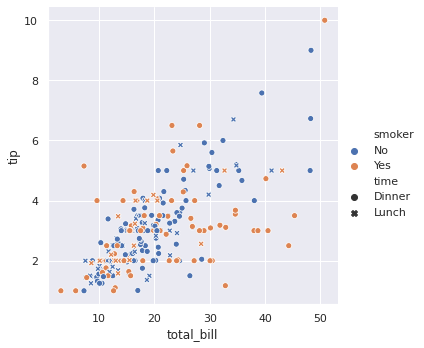

In [6]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

-마커스타일을 time으로 지정해서 변수를 추가해줄수 있다.

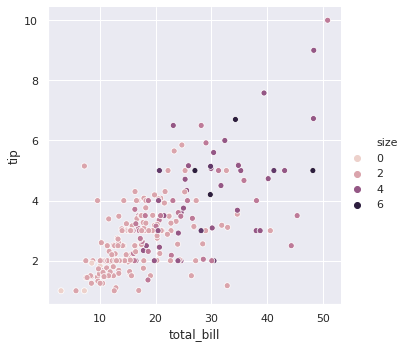

In [7]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

-파레트를 적용하여 색조변경

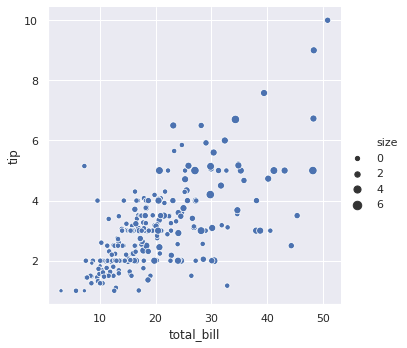

In [8]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

- 변수별 사이즈 변화 가능

### 2). Emphasizing continuity with line plots(라인 플롯으로 연속성 강조)

seaborn에서이 lineplot() or relplot()을 설정 하여 수행 -> kind="line".

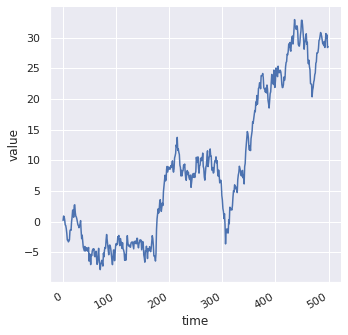

In [9]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

#### 집계 및 불확실성 표현

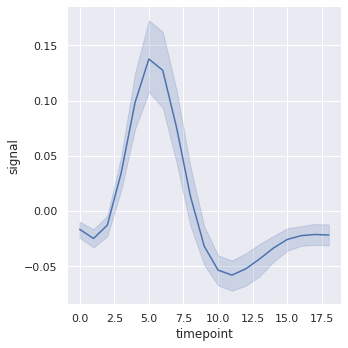

In [10]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

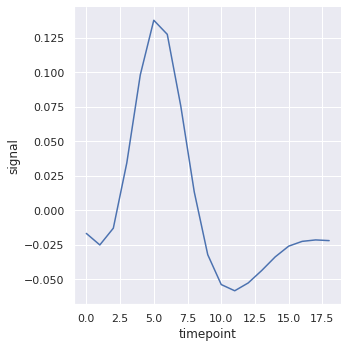

In [11]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

- ci에 대해서 비활성화 시켜준다.

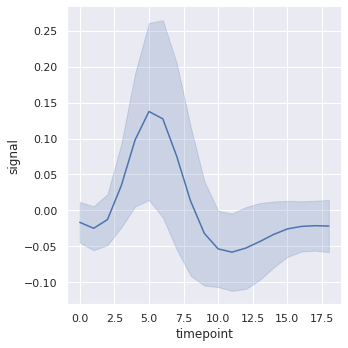

In [12]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

- 신뢰 구간 대신 표준 편차를 플로팅하여 각 시점에서 분포의 산포를 보여준다

#### 시맨틱 매핑을 사용하여 데이터의 하위 집합 플로팅

-hue는 색으로 추가 구분
-style은 선의 종류에 따라 추가 구분
-size는 선의 굵기에 따라서 추가 구분
 이외의 다양하 옵션이 추가된다(정규화,팔레트,대시 등등등)

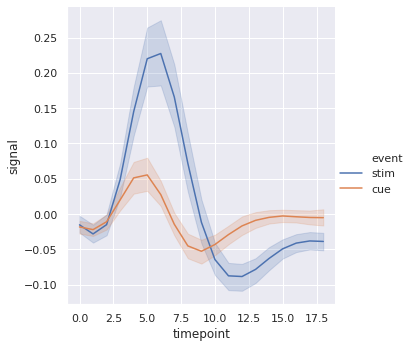

In [13]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

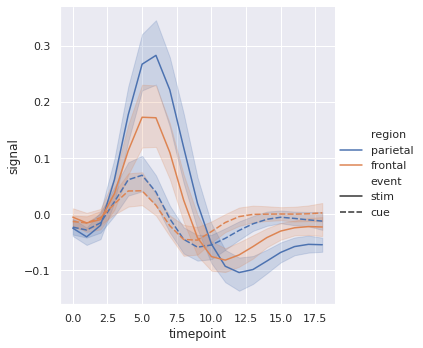

In [14]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

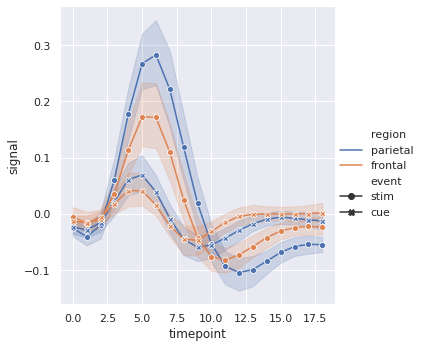

In [15]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

#### 날짜 데이터로 플로팅하기

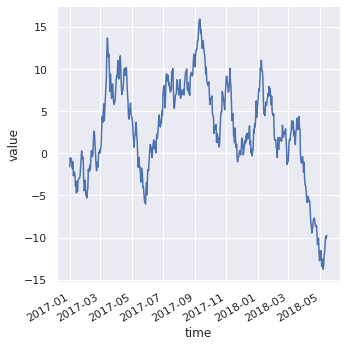

In [16]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

### 3). Showing multiple relationships with facets(패싯이 있는 영러관계 표시)


- col은 열로 구분
- row는 행으로 구분
- col_wrap은 열에 최대로 몇개까지 나타낼지 써준다.

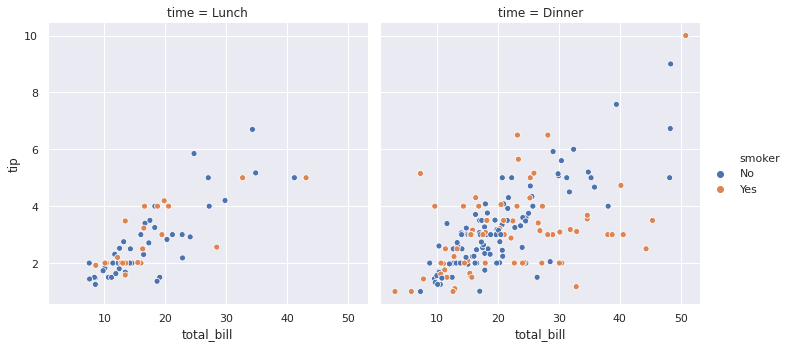

In [17]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

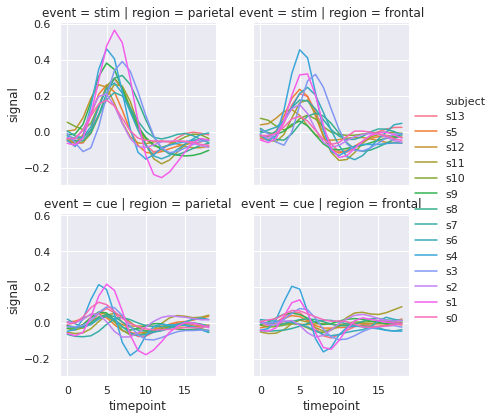

In [18]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

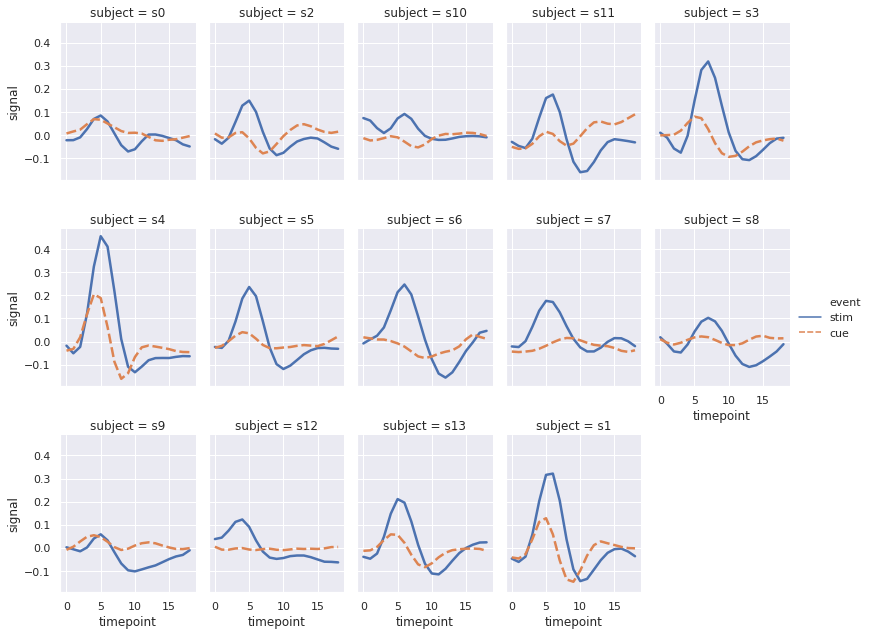

In [19]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

## Plotting with categorical data(범주 형 데이터로 플로팅하기)[링크 텍스트](https://)

- 범주 형 산점도
stripplot()(사용 kind="strip"; 기본값)
swarmplot()(와 함께 kind="swarm")

- 범주 형 분포도
boxplot()(와 함께 kind="box")
violinplot()(와 함께 kind="violin")
boxenplot()(와 함께 kind="boxen")

- 범주 형 추정 플롯
pointplot()(와 함께 kind="point")
barplot()(와 함께 kind="bar")
countplot()(와 함께 kind="count")

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

### 1). Categorical scatterplots(범주형 산점도)

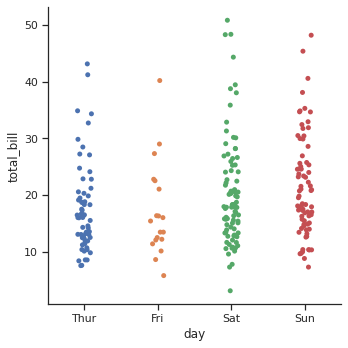

In [21]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips);

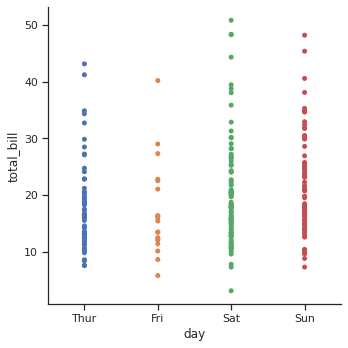

In [22]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

- 지터를 완전히 제어

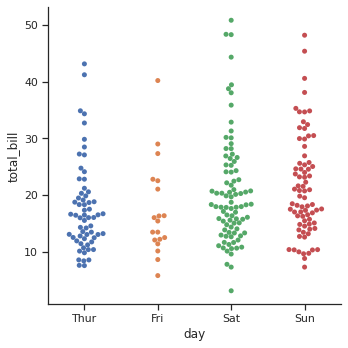

In [23]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

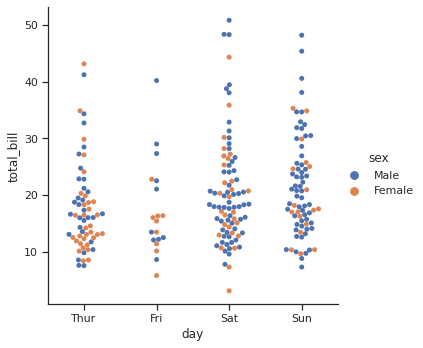

In [24]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

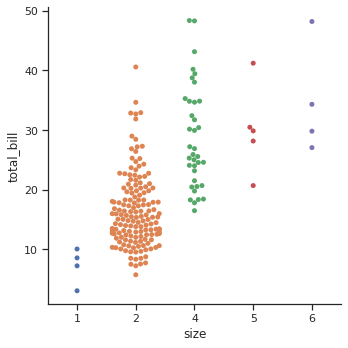

In [25]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"));

- size중 3을 빼고 실행한다.

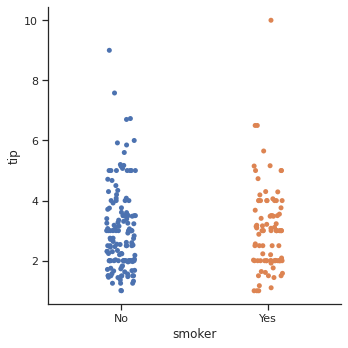

In [26]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

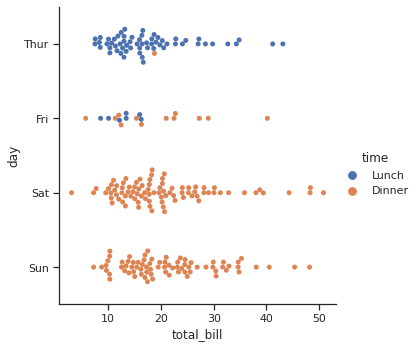

In [27]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

### 2). Distributions of observations within categories (범주 내 관찰 분포)

#### 박스 플롯

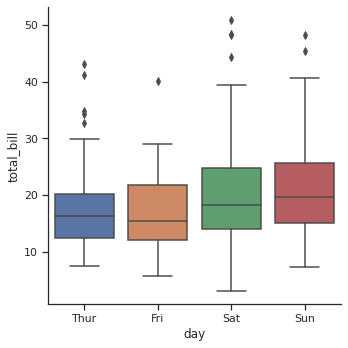

In [28]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

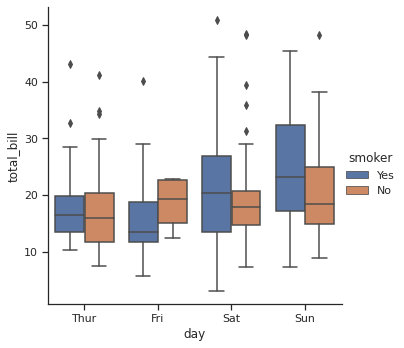

In [29]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

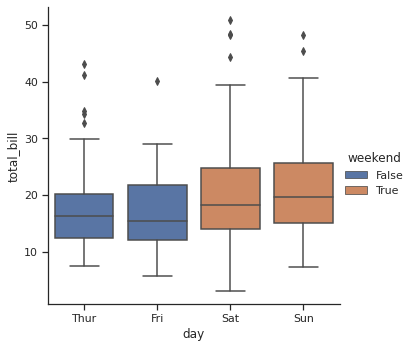

In [30]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips);

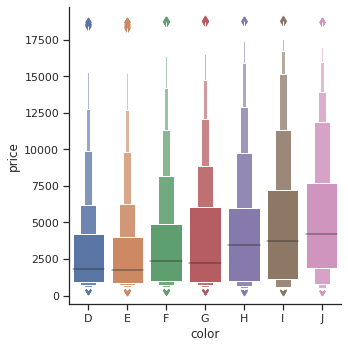

In [31]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"));

#### 바이올린 플롯

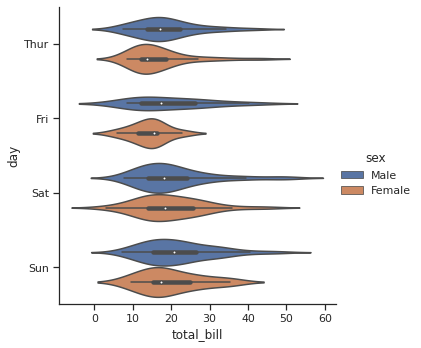

In [32]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=tips);

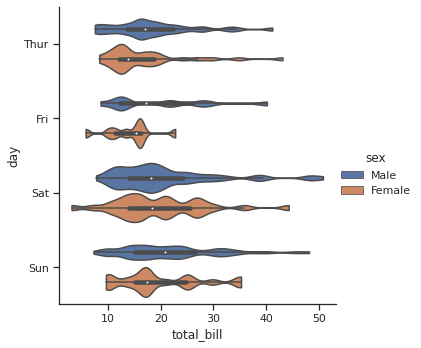

In [33]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", bw=.15, cut=0,
            data=tips);

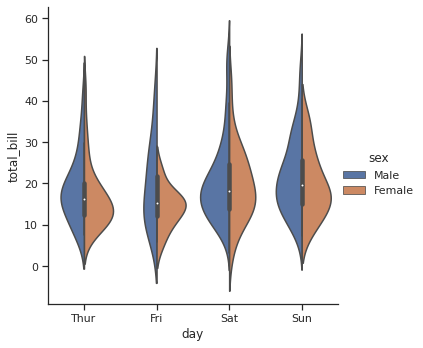

In [34]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

### 3). Statistical estimation within categories(카테고리 내 통계적 추정)

#### 막대그래프

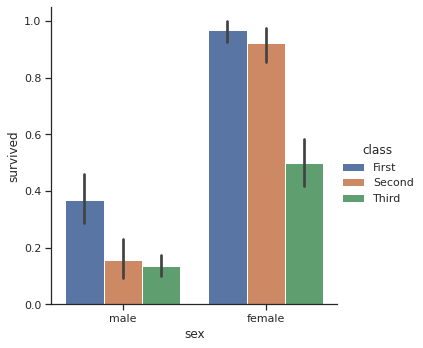

In [35]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

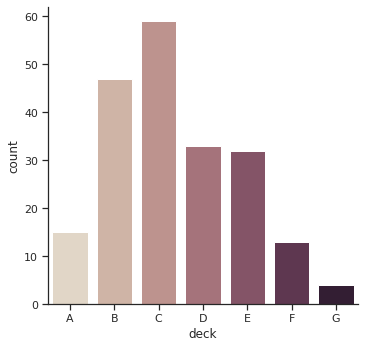

In [36]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

- 범주에 관측치수를 표시한다.

#### 포인트 플롯

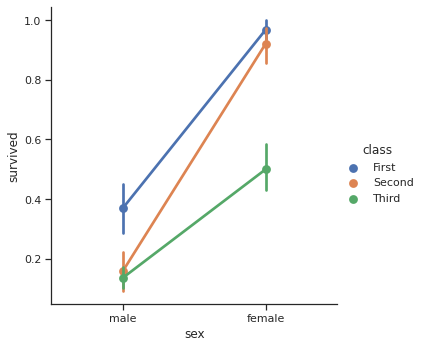

In [37]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

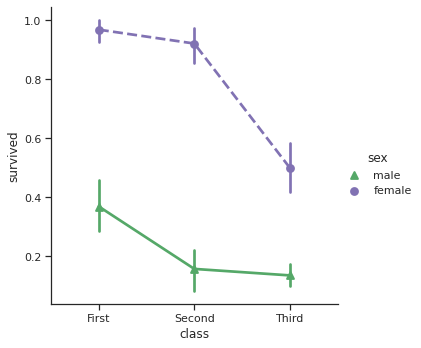

In [38]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);

- 선모양 색 등 다양한 추가 옵션이 가능하다.

### 4). Plotting “wide-form” data (와이드 형식 데이터 플로팅)

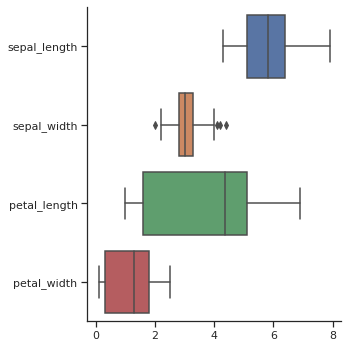

In [39]:
iris = sns.load_dataset("iris")
sns.catplot(data=iris, orient="h", kind="box");

- orient는 방향지정?

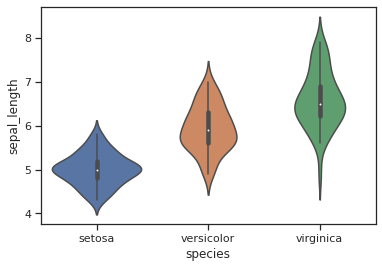

In [40]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

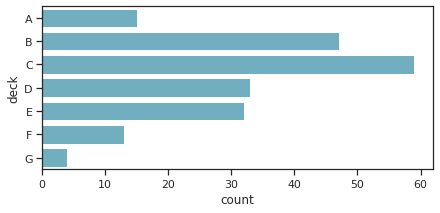

In [41]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

### 5). Showing multiple relationships with facets(패싯이있는 여러 관계 표시)

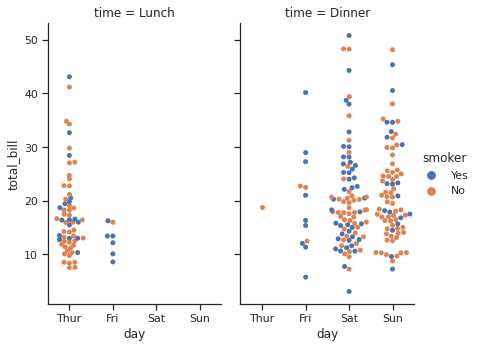

In [42]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips);

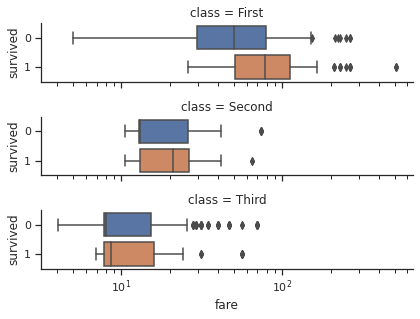

In [43]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log");

## Visualizing the distribution of a dataset(데이터 세트 분포 시각화)

### 1). Plotting univariate distributions(일 변량 분포 플로팅하기)

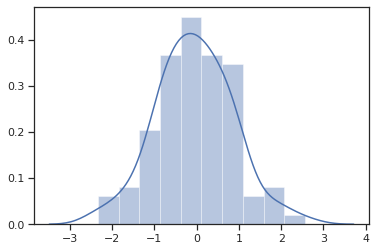

In [44]:
x = np.random.normal(size=100)
sns.distplot(x);

#### 히스토그램


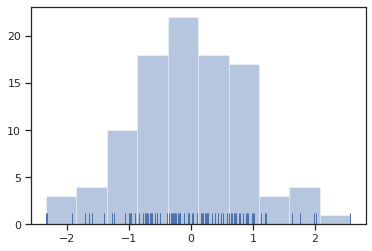

In [45]:
sns.distplot(x, kde=False, rug=True);

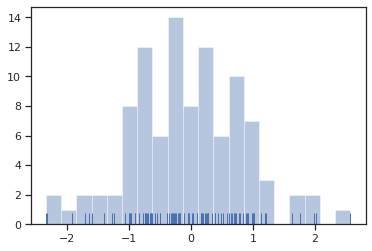

In [46]:
sns.distplot(x, bins=20, kde=False, rug=True);

#### 커널 밀도 추정

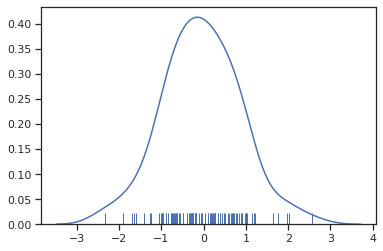

In [47]:
sns.distplot(x, hist=False, rug=True);

### 2). Plotting bivariate distributions(이변 량 분포 플로팅하기)

In [48]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

#### 산점도

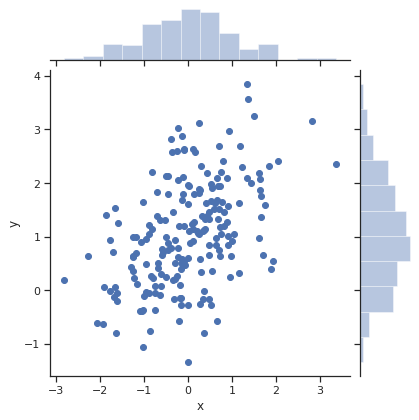

In [49]:
sns.jointplot(x="x", y="y", data=df);

#### 헥스 빈 플롯

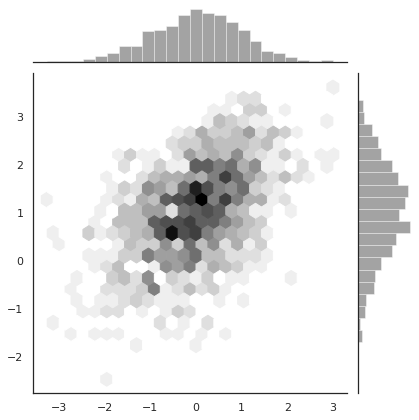

In [50]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

- 비교적 큰 데이터에서 잘 사용 가능.


#### 커널 밀도 추정

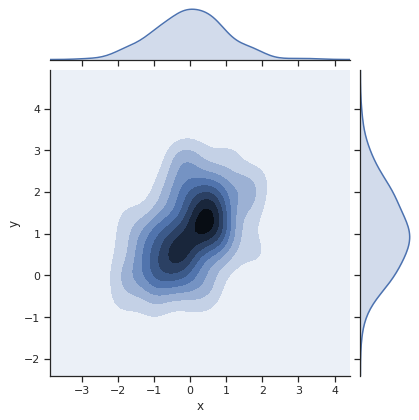

In [51]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

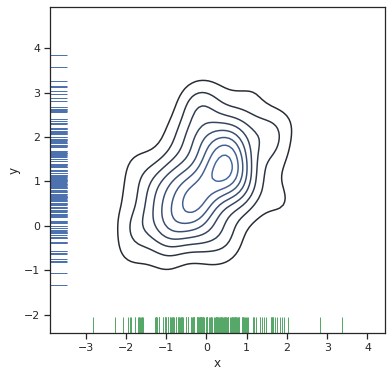

In [52]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

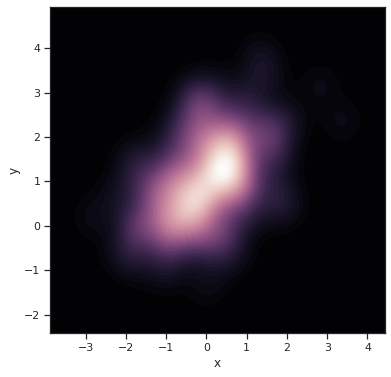

In [53]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

- 위의 결과들을 joint해준다.

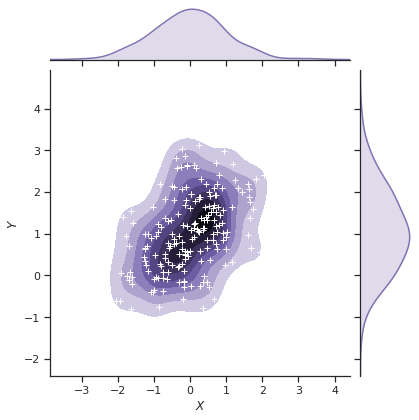

In [54]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

### 3).Visualizing pairwise relationships in a dataset(데이터 세트에서 쌍 관계 시각화)

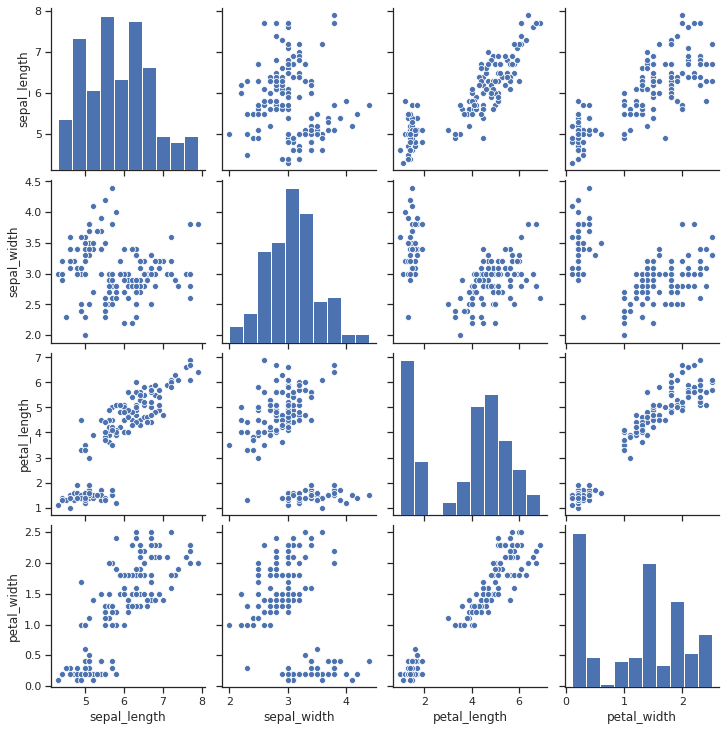

In [55]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

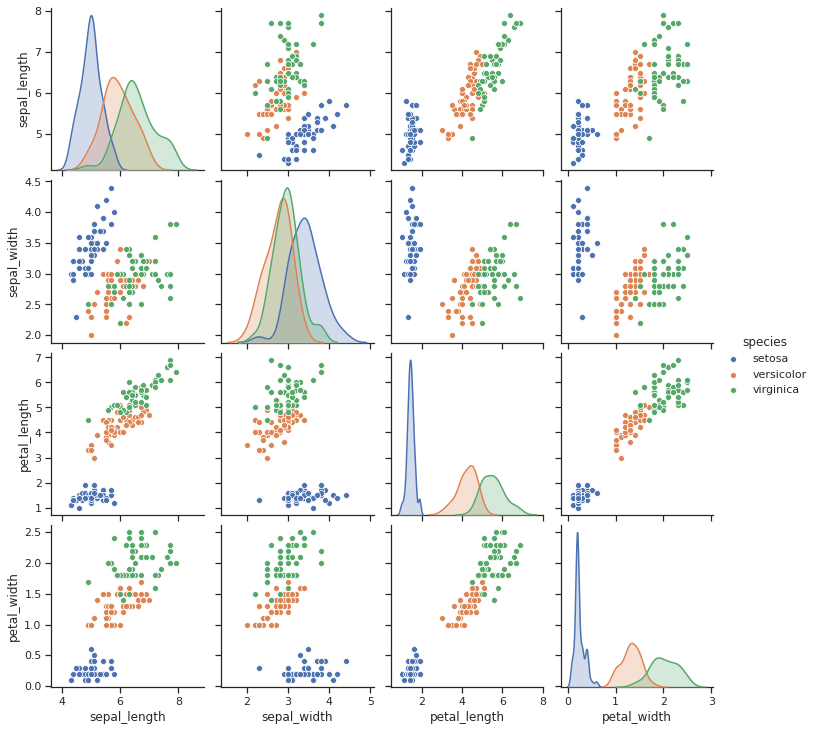

In [56]:
sns.pairplot(iris, hue="species");

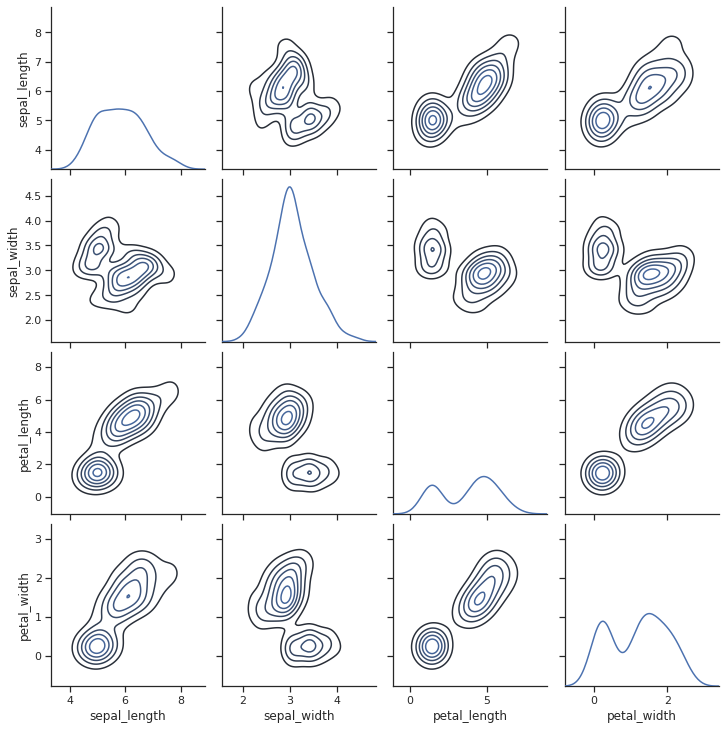

In [57]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

## Visualizing linear relationships(선형 관계 시각화)

In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
tips = sns.load_dataset("tips")

### 1). 선형 회귀 모델을 그리는 함수

- regplot과 implot은 단독으로 사용할때는 큰 차이가 없다.
- regplot과 달리 implot은 hue 파라미터로 변수를 지정하여 카테고리별로 각각 데이터의 분포와 선형 관계를 표시할 수 있다.

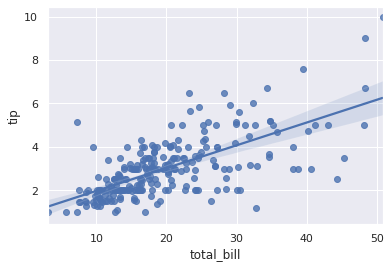

In [59]:
sns.regplot(x="total_bill", y="tip", data=tips);

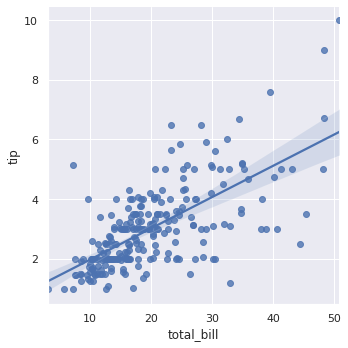

In [60]:
sns.lmplot(x="total_bill", y="tip", data=tips);

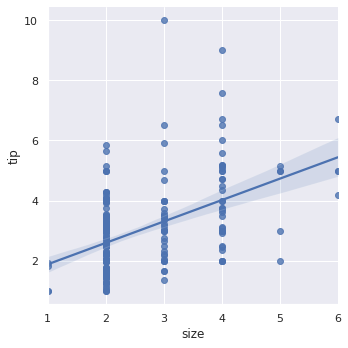

In [61]:
sns.lmplot(x="size", y="tip", data=tips);

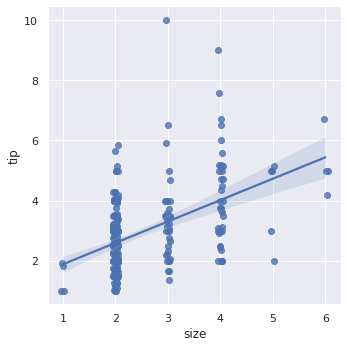

In [62]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

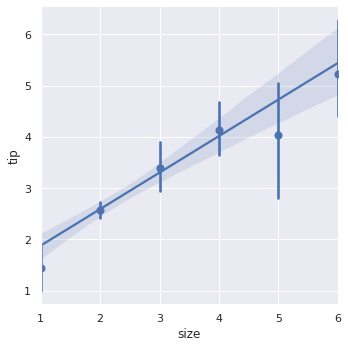

In [63]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

### 2). Fitting different kinds of models (다른종류의 모델 맞추기)

In [64]:
anscombe = sns.load_dataset("anscombe")

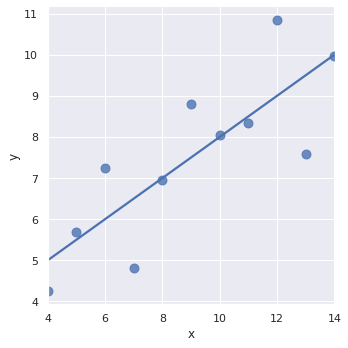

In [65]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

-  선형회귀의 좋은 모델

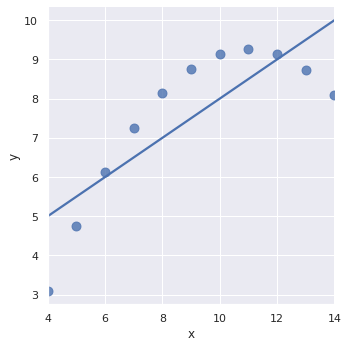

In [66]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

- 선형회귀의 좋지 않은 모델

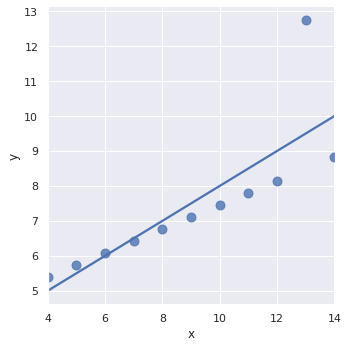

In [67]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

-  이상값 발견

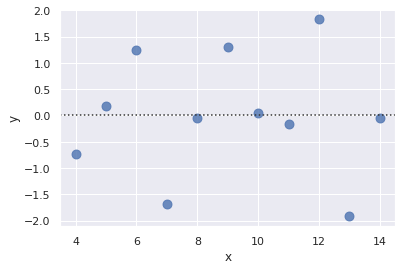

In [68]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

- 위의 결과처럼 무작위로 뿌려져 있어야 한다.

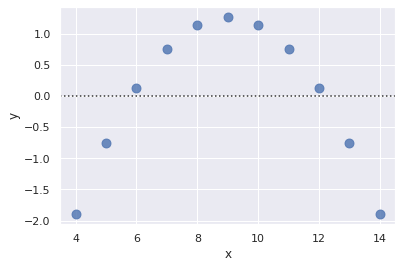

In [69]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

- 특정 구조가 있는 경우는 선형회귀가 적절하지 않음.

### 3).Conditioning on other variables (다양한 변수에 대한 조건화)

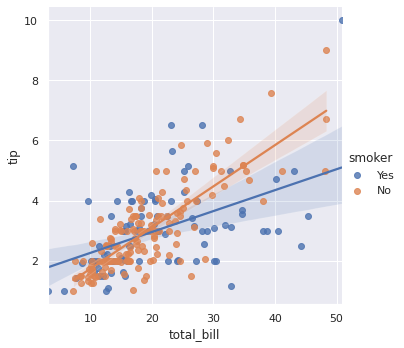

In [70]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

- 동일한 축에 플로팅하고 hue 조건으로 색상을 사용하여 구분

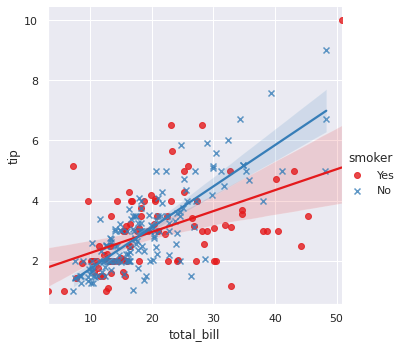

In [71]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

-  색상뿐 아니라 마커까지 사용하여 구분해준다.

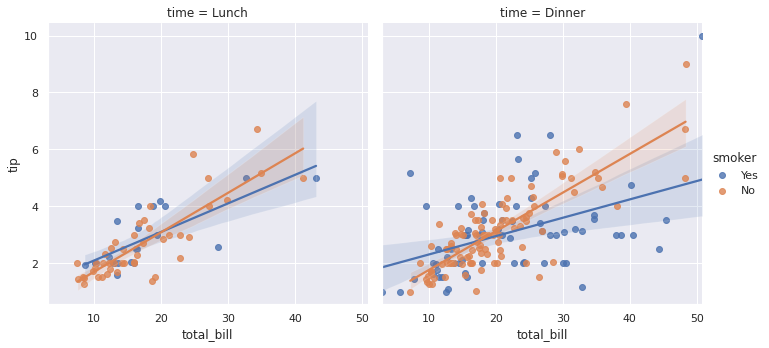

In [72]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

-  여러가지 패싯을 도축 col=time 으로 하여 구부해준다.


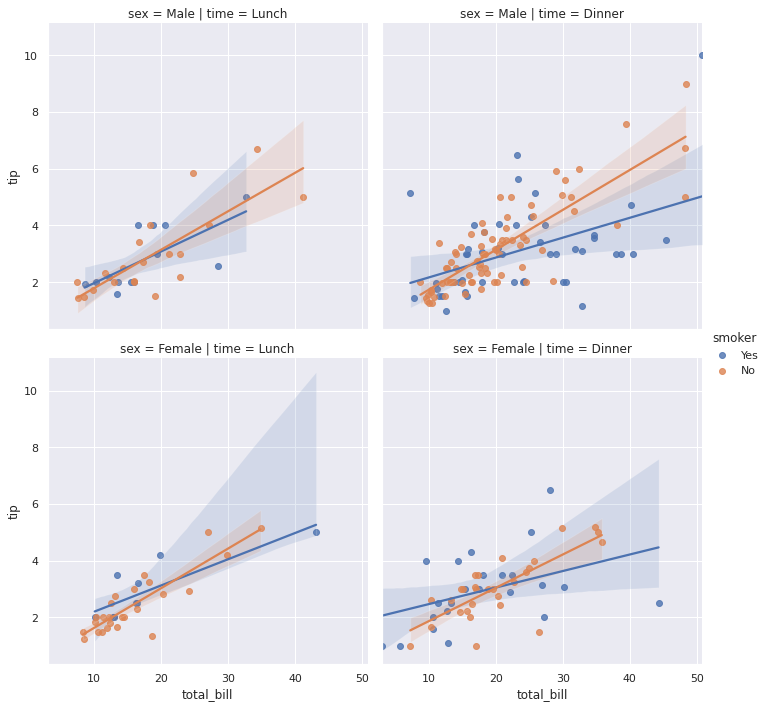

In [73]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

-여러가지 결괄르 도출 col=time,row=sex로 열과 행을 모두 구분해준다.

### 4). Controlling the size and shape of the plot(프롯의 크기와 모양 제어하기)

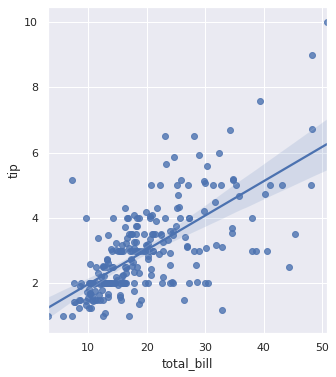

In [75]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

- 크기를 제어한다. 

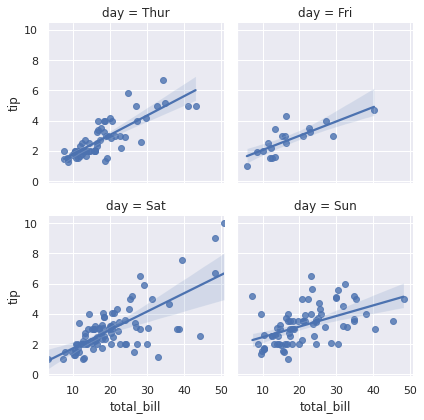

In [76]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, height=3);

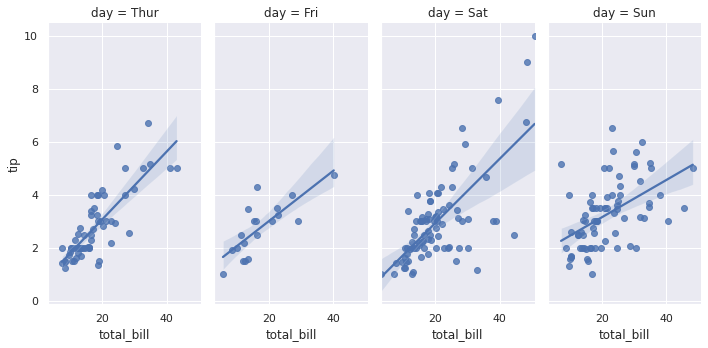

In [77]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

### 5).Plotting a regression in other contexts(다른 컨텍스트에서 회귀 그리기)

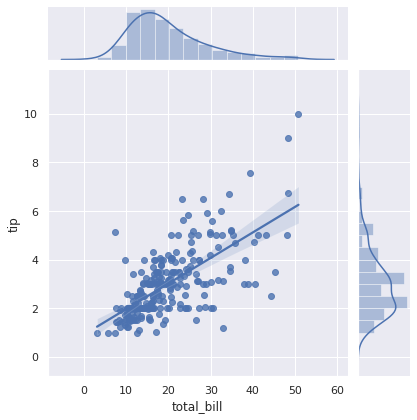

In [78]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

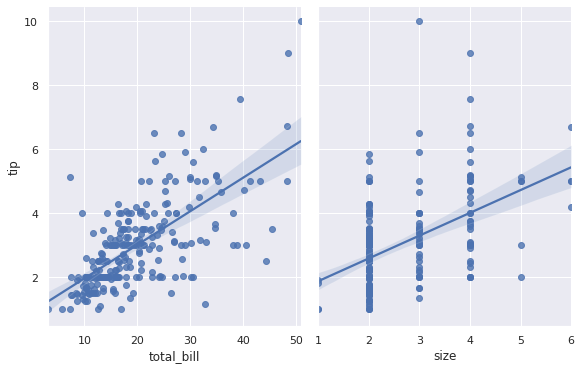

In [79]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg");

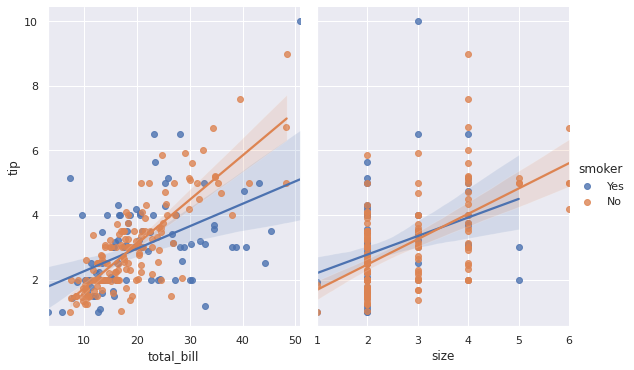

In [80]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg");

# Multi-plot grids

## Building structured multi-plot grids(구조화 된 다중 플롯 그리드 구축)

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

- 스타일을 지정해준다.

### 1). Conditional small multiples (조건부 작은 배수)

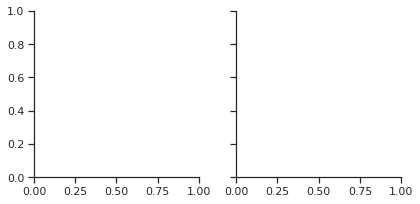

In [83]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time")

- 그리드를 초기화하여 matplotlib 그림과 축만 설정한 상태


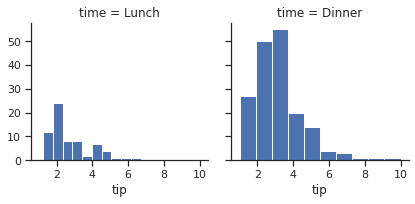

In [84]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip");

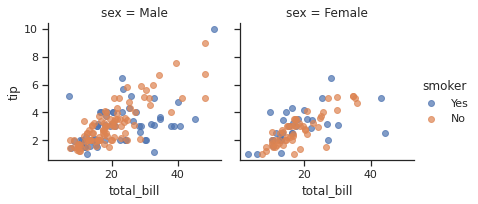

In [85]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

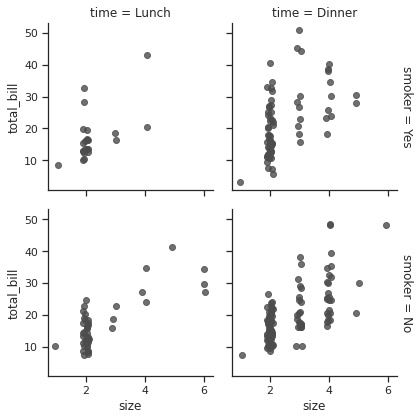

In [86]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);

- margin_titles bool, 선택 사항 : True행 변수의 제목이 마지막 열의 오른쪽에 그려집니다. 이 옵션은 실험적이며 모든 경우에 작동하지 않을 수 있습니다.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


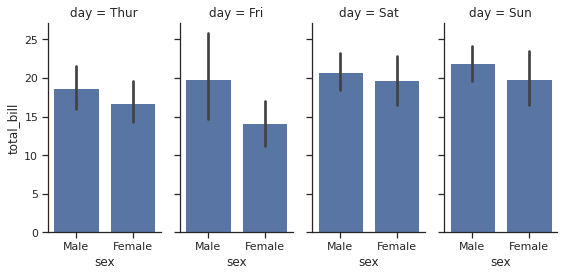

In [87]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill");

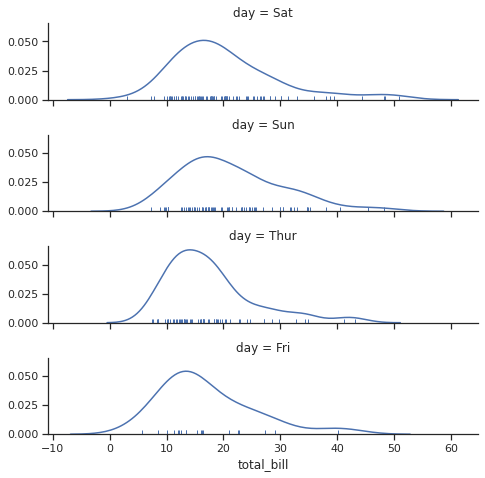

In [88]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

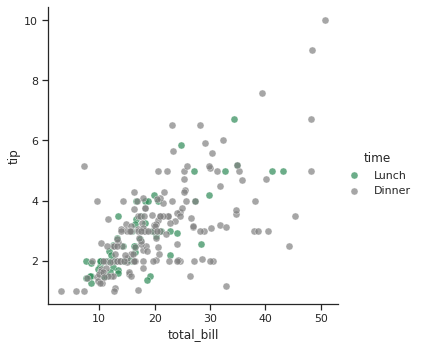

In [89]:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, hue="time", palette=pal, height=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

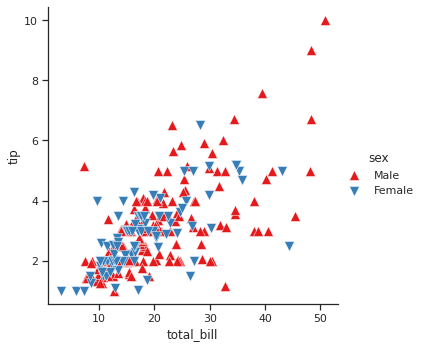

In [90]:
g = sns.FacetGrid(tips, hue="sex", palette="Set1", height=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

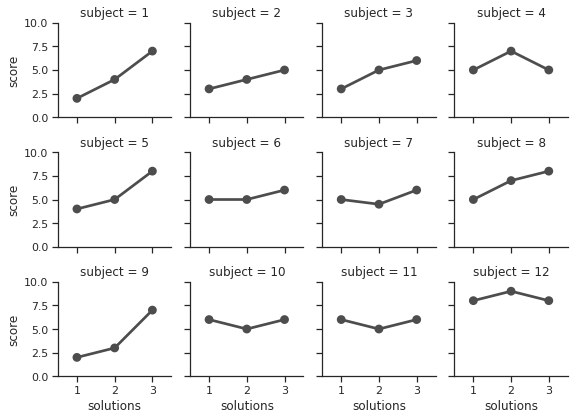

In [91]:
attend = sns.load_dataset("attention").query("subject <= 12")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", order=[1, 2, 3], color=".3", ci=None);

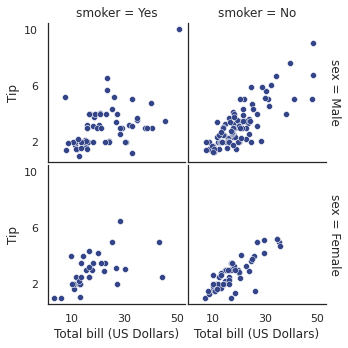

In [92]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5);
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]);
g.fig.subplots_adjust(wspace=.02, hspace=.02);

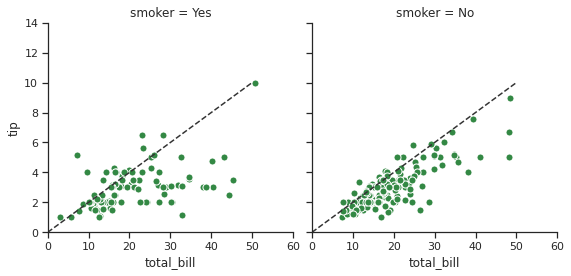

In [93]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c=".2", ls="--")
g.set(xlim=(0, 60), ylim=(0, 14));

### 2). 사용자 정의함수 사용